# Classification
The fundamental goal of machine learning is to understand the relationship between the independent variable(s) and the dependent variable. 


In classification, our target column has a finite set of possible values which represent different categories a row can belong to.

We'll focus on binary classification for now, where the only 2 options for values are

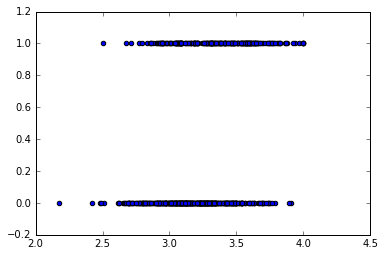

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
admissions = pd.read_csv("admission.csv")
plt.scatter(admissions["gpa"],admissions["admit"])
plt.show()

# Logistic regression
Classification focuses on estimating the relationship between the independent variables and the dependent, categorical variable.

While a linear regression model outputs a real number as the label, a logistic regression model outputs a probability value. In binary classification, if the probability value is larger than a certain threshold probability, we assign the label for that row to 1 or 0 otherwise.



#  Logit function
In logistic regression, we use the logit function, which is a version of the linear function that is adapted for classification. 

 Unlike in linear regression, where the output can be any real value, in logistic regression the output has to be a real value between 0 and 1, since the output represents a probability value. 
 
 Here's the mathematical representation of the logit function:

σ(t)=exp(t) / 1+exp(t)

The exponential transformation and the normalization forces the output values to be squeezed between 0 and 1



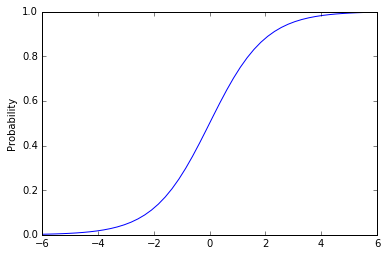

In [7]:
import numpy as np

#Logit function
def logit(x):
    return np.exp(x) / (1 + np.exp(x))

x = np.linspace(-6,6,50,dtype=float)
y = logit(x)

plt.plot(x,y)
plt.ylabel("Probability")
plt.show()

# Training a logistic regression model
Let's now move onto training the logistic regression model using our dataset. 

Training a logistic regression model in scikit-learn is similar to training a linear regression model, with the key difference that we use the LogisticRegression class instead of the LinearRegression class. Scikit-learn was designed to make it easy to swap out models by keeping the syntax and notation as consistent as possible across it's different classes.

In [9]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]],admissions["admit"])

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]],admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Plotting probabilities
We mentioned earlier that the output of a logistic regression model is the probability that the row should be labelled as True, or in our case 1. We can use the trained model to return the predicted probability for each row in the training data.



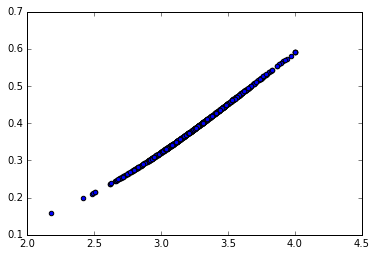

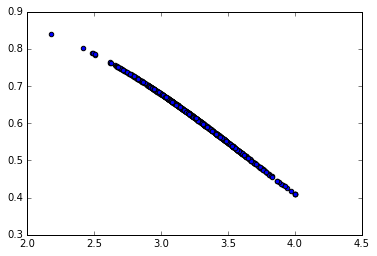

In [14]:
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(admissions["gpa"],pred_probs[:,1])
plt.show()
plt.scatter(admissions["gpa"],pred_probs[:,0])
plt.show()


In [12]:
pred_probs

array([[ 0.63387925,  0.36612075],
       [ 0.57129481,  0.42870519],
       [ 0.74047132,  0.25952868],
       ..., 
       [ 0.64994522,  0.35005478],
       [ 0.53382225,  0.46617775],
       [ 0.53831902,  0.46168098]])

# Predict labels
You'll notice that the scatter plot suggests a linear relationship between the gpa values and the probability of being admitted.

Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable.

Let's now use the predict method to return the label predictions for each row in our training dataset.

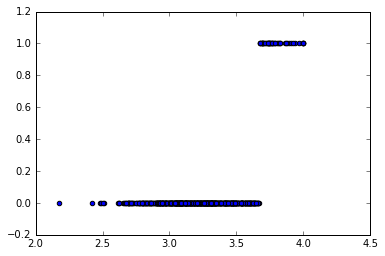

In [15]:
fitted_labels = logistic_model.predict(admissions[["gpa"]])
plt.scatter(admissions["gpa"],fitted_labels)
plt.show()